## College Football Dataset Exploration -- Packhacks 2021

**Notebook Goal: Explore the various facets of this expansive dataset, find interesting relationships between variables, and implement/propose various practical applications of this data.**

Ideas to Explore:
 - Time-Series Analysis
 - Categorical Classification
 - Variable Correlation
 - Advanced Applications

Before all of that fun stuff we need to take a step back and explore the dataset structure to extract features to use.


In [1]:
# Import the os module, for the os.walk function
import os
 
# Set the directory you want to start from
rootDir = '.'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)

# Count the number of csv files within each folder
csv_filter = lambda x: '.csv' in x
print("\n# CSV's in year-folder:", len(list(filter(csv_filter, os.listdir(".\college_fb_data\cfbstats-com-2005-1-5-0")))))


Found directory: .
	preprocess.ipynb
Found directory: .\college_fb_data
Found directory: .\college_fb_data\cfbstats-com-2005-1-5-0
	conference.csv
	drive.csv
	game-statistics.csv
	game.csv
	kickoff-return.csv
	kickoff.csv
	LICENSE.txt
	pass.csv
	play.csv
	player-game-statistics.csv
	player.csv
	punt-return.csv
	punt.csv
	reception.csv
	RELEASE.txt
	rush.csv
	stadium.csv
	team-game-statistics.csv
	team.csv
Found directory: .\college_fb_data\cfbstats-com-2006-1-5-0
	conference.csv
	drive.csv
	game-statistics.csv
	game.csv
	kickoff-return.csv
	kickoff.csv
	LICENSE.txt
	pass.csv
	play.csv
	player-game-statistics.csv
	player.csv
	punt-return.csv
	punt.csv
	reception.csv
	RELEASE.txt
	rush.csv
	stadium.csv
	team-game-statistics.csv
	team.csv
Found directory: .\college_fb_data\cfbstats-com-2007-1-5-0
	conference.csv
	drive.csv
	game-statistics.csv
	game.csv
	kickoff-return.csv
	kickoff.csv
	LICENSE.txt
	pass.csv
	play.csv
	player-game-statistics.csv
	player.csv
	punt-return.csv
	punt.csv
	rec


**From this os.walk(), it's clear that the data is split into folders: each representing the years 2005-20013 inclusive.**

    len(list(filter(csv_filter, os.listdir(".\college_fb_data\cfbstats-com-2005-1-5-0"))))
    
    > 17

Within each folder there are 17 csv files, including statistics on game conferences, regions, turnout, specific plays, and players. In this notebook we are going to look for interesting trends and potential applications for this data.

## Time-Series Analysis

One of the simplest and most insightful features we can extract from this dataset is exploring the nature of how college football has evolved over the years. 

We can begin by plotting a few features over time, moving on to moderate techniques such as rolling averages, and evetually attempt advanced applications involving Recurrent Neural Networks to make predictions 

 - Average League Game Score Over Time
 - How has the distribution changed?




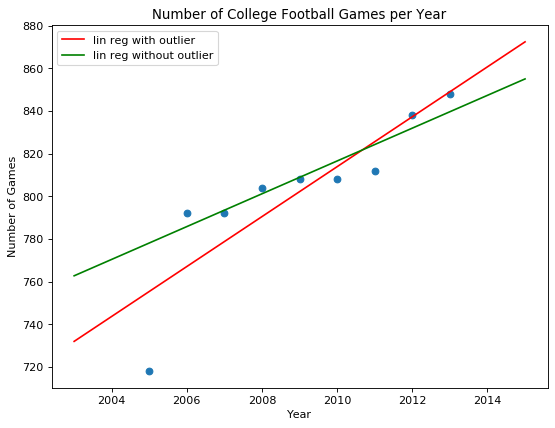

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import numpy as np

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# load game statistics for every available year into pandas dataframes
root = "./college_fb_data/"
year_folders = os.listdir(root)[:-1]
year_game_stats = [pd.read_csv(root+i+"/game-statistics.csv") for i in year_folders]

# extract games per year and plot
years = [int(x[13:17]) for x in year_folders]
num_games_per_year = [year_game_stats[i].shape[0] for i in range(len(years))]

#print(years, num_games_per_year)
plt.scatter(years, num_games_per_year)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Number of College Football Games per Year")


# compute linear regression with/without outlier point t=2005 (Determined by IQR Test)
slope, intercept, r_value, p_value, std_err = stats.linregress(years,num_games_per_year)
mn=np.min(years)-2
mx=np.max(years)+2
x1=np.linspace(mn,mx,500)
y1=slope*x1+intercept
plt.plot(x1,y1,'-r', label='lin reg with outlier')

slope, intercept, r_value, p_value, std_err = stats.linregress(years[1:],num_games_per_year[1:])
mn=np.min(years)-2
mx=np.max(years)+2
x1=np.linspace(mn,mx,500)
y1=slope*x1+intercept
plt.plot(x1,y1,'-g', label='lin reg without outlier')

plt.legend()
plt.show()

Visually, the linear regression with the outliers removed will likely perform well for the next few years following the provided time-frame.

 However in order to achieve a more long-term model, intuitivily a logistic model will likely perform better due to the practical limits on the number of games able to be organized and enjoyed.

Let's try to visually confirm this theory.

In [2]:
from scipy import optimize

def logistic_function(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))

bounds = (0, [10000., 3., 100000000.])
(a,b,c),cov = optimize.curve_fit(logistic_function, years, num_games_per_year, bounds=)

print(x)

TypeError: fit() missing 1 required positional argument: 'y'

## Real Life Applications:


Feature Engineering:

The most vital step to ensuring that our team matchup prediction system is deciding what data to omit vs input.